In [38]:
from keras import models
from keras import layers
import tensorflow as tf

In [12]:
 from tensorflow.python.client import device_lib

In [62]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3224835674313765601, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 206553088
 locality {
   bus_id: 1
 }
 incarnation: 1097446525272131539
 physical_device_desc: "device: 0, name: GeForce GPU, pci bus id: 0000:01:00.0, compute capability: 5.0"]

In [ ]:
with tf.device("/device:GPU:0"):
    

In [14]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [15]:
train_data[0]
train_labels[0]

1

In [16]:
 max([max(sequence) for sequence in train_data])

9999

In [17]:
word_index = imdb.get_word_index()  

In [18]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) 

In [19]:
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[1]]) 

In [20]:
reverse_word_index.get(1)

'the'

In [21]:
import numpy as np

In [22]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

In [23]:
x_train = vectorize_sequences(train_data)  
x_test = vectorize_sequences(test_data)

In [24]:
x_train.shape

(25000, 10000)

In [25]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [26]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [27]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 8s 533us/step - loss: 0.4856 - acc: 0.8065 - val_loss: 0.3523 - val_acc: 0.8641
Epoch 2/10
15000/15000 [==============================] - 7s 490us/step - loss: 0.2558 - acc: 0.9106 - val_loss: 0.3083 - val_acc: 0.8736
Epoch 3/10
15000/15000 [==============================] - 8s 548us/step - loss: 0.1742 - acc: 0.9423 - val_loss: 0.3059 - val_acc: 0.8822
Epoch 4/10
15000/15000 [==============================] - 7s 441us/step - loss: 0.1322 - acc: 0.9581 - val_loss: 0.3273 - val_acc: 0.8823
Epoch 5/10
15000/15000 [==============================] - 8s 537us/step - loss: 0.1071 - acc: 0.9669 - val_loss: 0.3742 - val_acc: 0.8745
Epoch 6/10
15000/15000 [==============================] - 8s 521us/step - loss: 0.0911 - acc: 0.9732 - val_loss: 0.3987 - val_acc: 0.8755
Epoch 7/10
15000/15000 [==============================] - 8s 508us/step - loss: 0.0796 - acc: 0.9782 - val_loss: 0.4203 - 

In [61]:
from keras import backend as K
K.tensorflow_backend._get_current_tf_device()

In [55]:
d = tf.device('/device:CPU:0')
d

In [ ]:
with tf.device('/device:GPU:0'):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
    history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [58]:

with tf.Session( config = tf.ConfigProto(allow_soft_placement = True, log_device_placement = True ) ):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
    history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 377s 25ms/step - loss: 0.4877 - acc: 0.7814 - val_loss: 0.3274 - val_acc: 0.8802
Epoch 2/4
15000/15000 [==============================] - 4s 245us/step - loss: 0.2482 - acc: 0.9130 - val_loss: 0.2782 - val_acc: 0.8902
Epoch 3/4
15000/15000 [==============================] - 4s 247us/step - loss: 0.1790 - acc: 0.9359 - val_loss: 0.2889 - val_acc: 0.8898
Epoch 4/4
15000/15000 [==============================] - 4s 234us/step - loss: 0.1340 - acc: 0.9541 - val_loss: 0.3442 - val_acc: 0.8761


In [60]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [69]:
history_dict = history.history

In [70]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [71]:
acc = history_dict['acc']
val_acc = history_dict['acc']

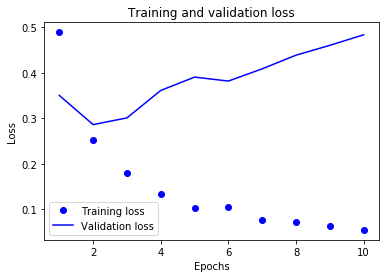

In [72]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

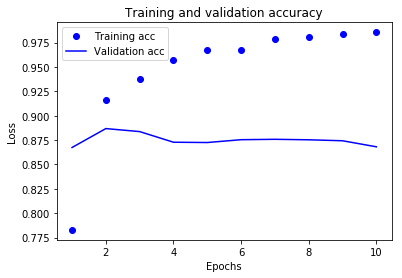

In [73]:
plt.clf()                                      
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [86]:
slice = int(1201 * .8)
slice

960

In [ ]:
x_orig = x_train
y_orig = y_train

for n in range(19):
    
    size = int(1250 * (n+1))
    x_train_set = x_train[:size]
    y_train_set = y_train[:size]
    
    slice = int(size * .8)
    x_val = x_train_set[:slice]
    partial_x_train = x_train_set[slice:]
    y_val = y_train_set[:slice]
    partial_y_train = y_train_set[slice:]
    
    
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=10,
                        batch_size=512,
                        validation_data=(x_val, y_val))


In [88]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [89]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]]) 

557056/550378 [==============================] - 1s 2us/step


In [90]:
train_labels[10]

3

In [91]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)           
x_test = vectorize_sequences(test_data)  

In [92]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels)  

In [93]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [94]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [96]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 582us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 264us/step - loss: 1.4448 - acc: 0.6877 - val_loss: 1.3455 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 3s 319us/step - loss: 1.0948 - acc: 0.7656 - val_loss: 1.1709 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 2s 304us/step - loss: 0.8694 - acc: 0.8162 - val_loss: 1.0799 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 2s 298us/step - loss: 0.7029 - acc: 0.8478 - val_loss: 0.9840 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 248us/step - loss: 0.5664 - acc: 0.8794 - val_loss: 0.9414 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 261us/step - loss: 0.4581 - acc: 0.9044 - val_loss: 0.9078 - val_acc: 0.8010


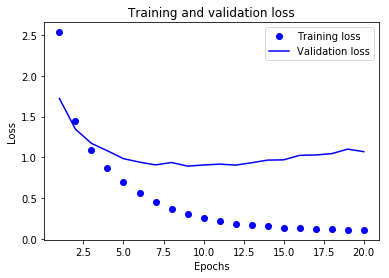

In [97]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

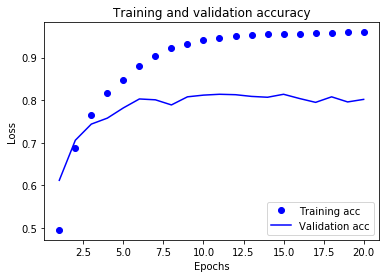

In [98]:
plt.clf()                                                

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [99]:
predictions = model.predict(x_test)

In [100]:
predictions[0].shape

(46,)

In [101]:
 np.sum(predictions[0])

0.99999946

In [102]:
np.argmax(predictions[0])

3

In [103]:
predictions[0]

array([1.08177755e-06, 8.64433844e-07, 5.79485127e-09, 9.77195740e-01,
       2.09468622e-02, 1.16266552e-09, 4.49135173e-09, 1.17014961e-05,
       3.73824936e-04, 4.47885810e-07, 3.80055053e-06, 2.29679441e-04,
       2.03152449e-05, 7.45359472e-08, 8.67223520e-08, 1.31072909e-07,
       1.95087821e-04, 1.59502940e-06, 2.53314943e-06, 6.78947254e-05,
       7.97712884e-04, 8.76106133e-05, 1.15495129e-06, 2.06014281e-08,
       3.13311972e-07, 2.24680701e-08, 5.83388199e-11, 3.27702764e-07,
       6.95319522e-06, 3.28118659e-07, 2.78482930e-05, 1.31626265e-08,
       5.87551585e-06, 8.89343283e-08, 5.53724067e-06, 2.29064185e-07,
       1.19758488e-05, 6.43802309e-08, 6.71043040e-07, 2.26389769e-08,
       2.17870308e-07, 5.66302731e-07, 2.27884527e-07, 4.21074509e-09,
       7.77818310e-10, 6.85936641e-10], dtype=float32)

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [6]:
def build_model():
    model = models.Sequential()                                  
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [11]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    history  = model.fit(partial_train_data, partial_train_targets,                     
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)      
    all_scores.append(val_mae)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0


KeyError: 'val_mean_absolute_error'

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]